In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# This notebook follows the example in https://towardsdatascience.com/pima-indian-diabetes-prediction-7573698bd5fe

In [4]:
pip install pandas-profiling
# error is thrown when this command is used in the command line. 
# so was installed this way in github, restart kernel 

SyntaxError: invalid syntax (<ipython-input-4-0683be666435>, line 1)

In [5]:
from pandas_profiling import ProfileReport
# pandas profiler is used to get in depth info about the data but it takes some time.
#caution for use in large datasets

In [3]:
df = pd.read_csv('pima-indians-diabetes-database/diabetes.csv')

In [4]:
%matplotlib inline

In [8]:
file = ProfileReport(df)
file.to_file(output_file='output.html')

In [12]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df['Age'].mean()

33.240885416666664

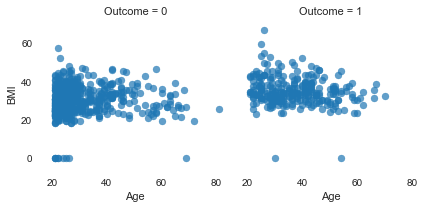

In [20]:
g = sns.FacetGrid(df, col = 'Outcome')
g.map(plt.scatter, 'Age','BMI', alpha=.7)
g.add_legend()


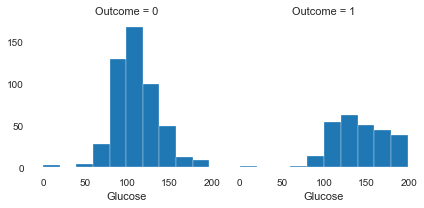

In [21]:
g = sns.FacetGrid(df, col='Outcome')
g.map(plt.hist,'Glucose')

In [6]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.shape

(768, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
pd.value_counts(df['Insulin'].values, sort=True)

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Length: 186, dtype: int64

In [5]:
pd.isna(df).count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [21]:
df.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


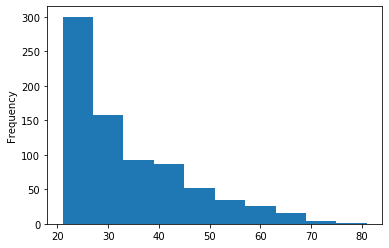

In [13]:
df['Age'].plot(kind='hist')
# Age is positively skewed

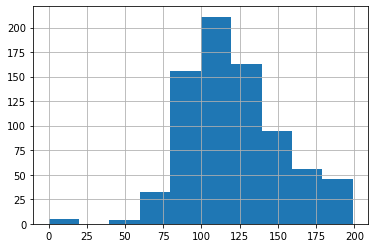

In [10]:
df['Glucose'].hist()

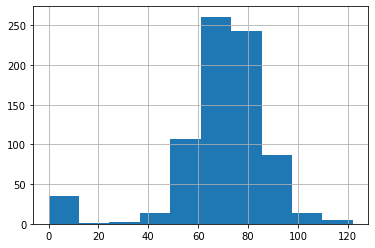

In [14]:
df['BloodPressure'].hist()

In [17]:
from scipy.stats import shapiro
shapiro(df['BloodPressure'])


(0.8189212083816528, 1.5840069624449098e-28)

In [16]:
# null hypothesis is that the data is normal
# The p-value is less than 0.0001, this is < 5% Level of significance and 
# therefore reject the null hypothesis.

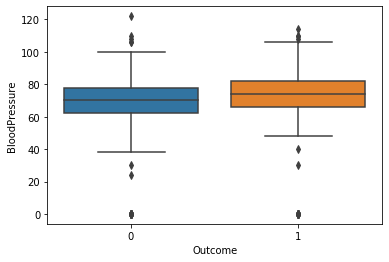

In [24]:
ax = sns.boxplot(x='Outcome', y='BloodPressure', data=df)

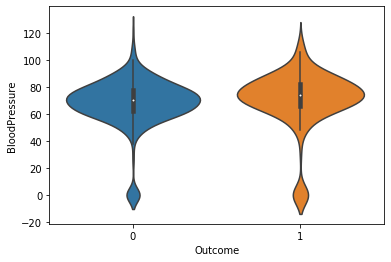

In [22]:
av = sns.violinplot(x='Outcome', y='BloodPressure', data=df)

In [25]:
df.loc[df['Outcome']==1].isin([0]).sum()

Pregnancies                  38
Glucose                       2
BloodPressure                16
SkinThickness                88
Insulin                     138
BMI                           2
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [26]:
df.loc[df['Outcome']==0].isin([0]).sum()

Pregnancies                  73
Glucose                       3
BloodPressure                19
SkinThickness               139
Insulin                     236
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [32]:
q = df.groupby('Outcome')
q['BloodPressure'].mean()

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64

In [33]:
df1 = df.loc[df['Outcome']==1]
df2 = df.loc[df['Outcome']==0]

In [34]:
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
data = [df1,df2]
df = pd.concat(data)

In [35]:
df.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64